In [1]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
targets_orig = [x.split("/")[-1][:-4] for x in image_files]
# abcd = [a,b,c,d]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)



targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc) + 1  # '0' is for unknown

train_imgs, test_imgs, train_targets, test_targets,train_orig_targets, test_orig_targets = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=42
)

train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs,
    targets=train_targets,
    resize=(config.IMAGES_HEIGHT,config.IMAGE_WIDTH)
)

In [5]:
npimg = train_dataset[0]["images"].numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


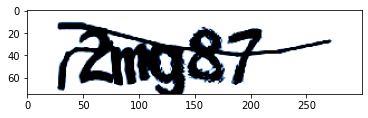

In [10]:
plt.imshow(np.transpose(npimg, (1,2,0)))